Getting Energy Consumption
What is your average monthly electricity bill in euros?1000
What is your average monthly natural gas bill in euros2000
What is your average monthly fuel bill in euros?3000
Transportation Information
How many Kilometers do your employees travel per year for business purposes?40000
What is the average fuel efficiency of the vehicle used for business travel in litres per 100 Kilomters?35
How many Kilometers do your employees travel per year?50000
Taking Waste data
How much waste do you generate per month in Kilograms?30000
How much of that waste is recycled?30


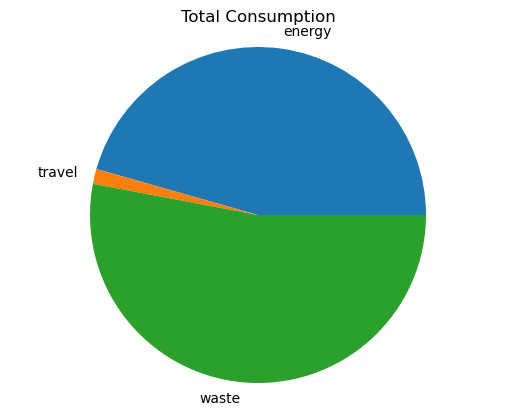

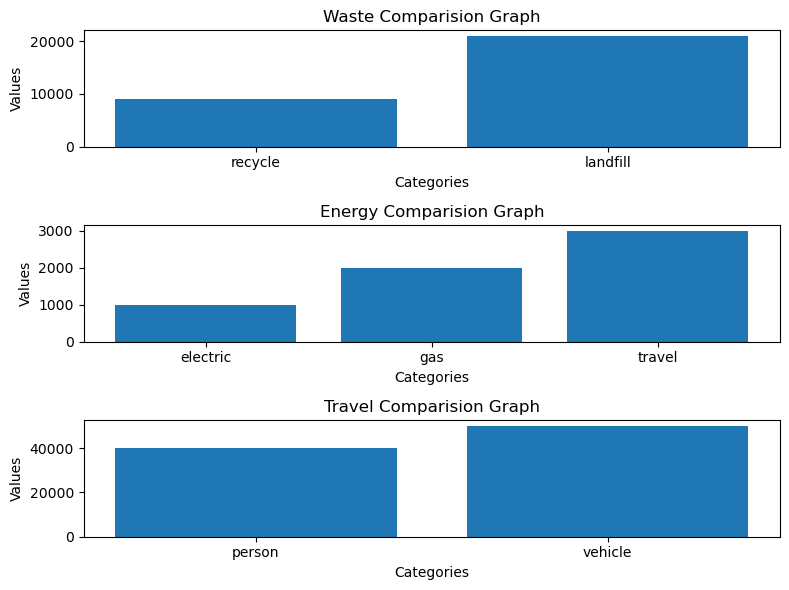

In [5]:
import matplotlib.pyplot as plt
import tkinter as tk

class CarbonEmissionAnalyzer():
    
    def suggestEnergyEmissions(self,data,suggestions):
        electricConsumption = data['energy']['electric']
        totalCO2Emission = electricConsumption * 0.92
        
        if totalCO2Emission > 600:
            suggestions.append("Please purchase efficient electric appliances")
        if electricConsumption > 1000:
            suggestions.append("Please Switch to CFLs, as they are better lighting investment, they are far efficient and consumed four times less.")

    def suggestTransportEmissions(self,data,suggestions):
        totalMiles = data['travel']['person'] +  data['travel']['vehicle']
        fuelEfficiency = data['travel']['fuelEfficiency']
        totalCO2Emission = (totalMiles /fuelEfficiency ) * 19.6
        
        if totalCO2Emission > 500:
            suggestions.append("Please conside car pooling options, or start using public transport.")
            suggestions.append("Please Avoid unnecessary meeting or if possibly take online meetings.")
        if fuelEfficiency > 15:
            suggestions.append("Upgrade to more fuel Efficient vehicle.")
            suggestions.append("Bimonthly vehicle checkup with mechanics is recommended.")
    
    def suggestWasteEmissions(self,data,suggestions):
        waste = data['total']['waste']
        recyled = data['waste']['recycle']
        totalCO2Emission = waste * 0.35
        
        if totalCO2Emission > 100:
            suggestions.append("Please buy organic foods, as they have less greenhouse gas emissions than conventional products.")
            
        if recyled < 40:
            suggestions.append("Reduce waste by recycling products after using or consuming.")
            suggestions.append("Seperate waste by paper, plastics, organics.")
    
    def generateSuggestions(self,data):
        
        suggestions = []
        CarbonEmissionAnalyzer.suggestTransportEmissions(self,data,suggestions)
        CarbonEmissionAnalyzer.suggestEnergyEmissions(self,data,suggestions)
        CarbonEmissionAnalyzer.suggestWasteEmissions(self,data,suggestions)
        CarbonEmissionAnalyzer.displaySuggestions(self,suggestions)
        
    
    def displaySuggestions(self,suggestions):
        root = tk.Tk()
        root.title("Sustainability Suggestions")

        suggestion_label = tk.Label(root, text="Here are some suggestions to help you live more sustainably:", font=("Arial Black", 18), wraplength=300)
        suggestion_label.pack()

        for i, suggestion in enumerate(suggestions):
            tk_suggestion = tk.Label(root, text=f"{i+1}. {suggestion}", font=("Arial Black", 12), wraplength=300)
            tk_suggestion.pack()

        root.mainloop()
        
        
class CarbonEmissionReport():
    def __init__(self,data):
        self.data = data

    def generateGraphOverall(self):
        data = self.data['total']
        labels = list(data.keys())
        sizes = list(data.values())

        plt.pie(sizes, labels=labels)
        plt.title('Total Consumption')
        plt.axis('equal')
        plt.show()
        
    def generateCategoryBarGraph(self):
        data1 = self.data['waste']
        categories1 = list(data1.keys())
        values1 = list(data1.values())

        plt.figure(figsize=(8, 6))
        plt.subplot(3, 1, 1) 
        plt.bar(categories1, values1)
        plt.xlabel('Categories')
        plt.ylabel('Values')
        plt.title('Waste Comparision Graph')

        data2 = self.data['energy']
        categories2 = list(data2.keys())
        values2 = list(data2.values())

        plt.subplot(3, 1, 2)
        plt.bar(categories2, values2)
        plt.xlabel('Categories')
        plt.ylabel('Values')
        plt.title('Energy Comparision Graph')

        data3 = self.data['travel']
        
        categories3 = [key for key in data3.keys() if key != 'fuelEfficiency']
        values3 = [data3[key] for key in categories3]

        plt.subplot(3, 1, 3)
        plt.bar(categories3, values3)
        plt.xlabel('Categories')
        plt.ylabel('Values')
        plt.title('Travel Comparision Graph')

        plt.tight_layout()
        plt.show()

class Error():

    def __init__(self):
        self.error = ""

    def errorHandler(self,error_msg):
        print("Error ",error_msg)

class CarbonEmissionCalculator():

    def __init__(self):
        self.data = {
            "energy": {},
            "travel": {},
            "waste": {},
            "total": {}
        }
        self.suggestions = []
        self.error = Error()

    def getTransportData(self):
        
        print("Transportation Information")
        try:
            person= float(input("How many Kilometers do your employees travel per year for business purposes?"))
            fuelEfficiency = float(input("What is the average fuel efficiency of the vehicle used for business travel in litres per 100 Kilomters?"))
            vehicle = float(input("How many Kilometers do your employees travel per year?"))
            total = float (person * (1 /fuelEfficiency) * (2.31))

            self.data['travel']['person'] = person
            self.data['travel']['vehicle'] = vehicle
            self.data['travel']['fuelEfficiency'] = fuelEfficiency
            self.data['total']['travel'] = total
        except ValueError as ve:
            self.error.errorHandler(str(ve))
            return None
        
        except ZeroDivisionError:
            self.error.errorHandler("Average fuel efficiency cannot be zero.")

        except TypeError:
            self.error.errorHandler("Input data type must be numeric.")
            return None

        except KeyError as ke:
            self.error.errorHandler(str(ke))
            
    def getEnergyConsumption(self):
        print("Getting Energy Consumption")
        try:
            eBill = float(input("What is your average monthly electricity bill in euros?"))
            nBill = float(input("What is your average monthly natural gas bill in euros"))
            tBill = float(input("What is your average monthly fuel bill in euros?"))
            total = (eBill) *(12)*(0.0005) + (nBill)*(12)*(0.0053) + (tBill) * (12) * (2.32)

            self.data['energy']['electric'] = eBill
            self.data['energy']['gas'] = nBill
            self.data['energy']['travel'] = tBill
            self.data['total']['energy'] = total
        except ValueError as ve:
            self.error.errorHandler(str(ve))
            return None
        
        except ZeroDivisionError:
            self.error.errorHandler("Average fuel efficiency cannot be zero.")

        except TypeError:
            self.error.errorHandler("Input data type must be numeric.")
            return None
        except KeyError as ke:
            self.error.errorHandler(str(ke))
            
    def getWasteData(self):
        print("Taking Waste data")
        
        try:
            consumed=float(input("How much waste do you generate per month in Kilograms?"))
            recycle= float(input("How much of that waste is recycled?"))
            landfill = 100 - recycle
            total = consumed * 12 * (0.57 - (recycle)/100)

            self.data['waste']['recycle'] = float((recycle * consumed)/ 100)
            self.data['waste']['landfill'] = float((landfill * consumed)/ 100)
            self.data['total']['waste'] = total
        except ValueError as ve:
            self.error.errorHandler(str(ve))
            return None
        
        except ZeroDivisionError:
            self.error.errorHandler("Average fuel efficiency cannot be zero.")

        except TypeError:
            self.error.errorHandler("Input data type must be numeric.")
            return None 
        except KeyError as ke:
            self.error.errorHandler(str(ke))
    def getUserData(self):
        self.getEnergyConsumption()
        self.getTransportData()
        self.getWasteData()
        
    def getEmissionData(self):
        return self.data

if __name__ == "__main__":
    carbonEmissionCalculator = CarbonEmissionCalculator()
    carbonEmissionCalculator.getUserData()
    data = carbonEmissionCalculator.getEmissionData()
    
    report = CarbonEmissionReport(data)
    report.generateGraphOverall()
    report.generateCategoryBarGraph()
    
    
    carbonEmissionAnalyzer = CarbonEmissionAnalyzer()
    carbonEmissionAnalyzer.generateSuggestions(data)